# regression

## problem definition
- predict profit for an organization knowning existing data

### pre-requisites

In [1]:
import warnings

warnings.filterwarnings(action='ignore')

### import required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [3]:
df = pd.read_csv('50_Startups.csv')
df.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnD             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### pre-processing

In [5]:
# label encode the State column
from sklearn.preprocessing import LabelEncoder

# create an object of LabelEncoder
encoder = LabelEncoder()

# encode the State column
df['State'] = encoder.fit_transform(df['State'])

In [7]:
df.cov()

,RnD,Administration,Marketing,State,Profit
RnD,2.107017e+09,3.111739e+08,4.065495e+09,4002.767347,1.800007e+09
Administration,3.111739e+08,7.849973e+08,-1.101690e+08,276.497551,2.266673e+08
Marketing,4.065495e+09,-1.101690e+08,1.495492e+10,7911.968776,3.685779e+09
State,4.002767e+03,2.764976e+02,7.911969e+03,0.693878,3.417788e+03
Profit,1.800007e+09,2.266673e+08,3.685779e+09,3417.787959,1.624588e+09


In [8]:
df.corr()

,RnD,Administration,Marketing,State,Profit
RnD,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


In [9]:
# remove Administration and State columns 
df.drop(['Administration', 'State'], axis=1, inplace=True)

In [11]:
# split the data into x and y
x = df.drop('Profit', axis=1)
y = df['Profit']

In [12]:
# split the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)

### train the model

In [13]:
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# train the model
model.fit(x_train, y_train)

LinearRegression()

### model evaluation

In [14]:
y_pred = model.predict(x_test)
y_true = y_test

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"mae = {mae}")
print(f"mse = {mse}")
print(f"rmse = {rmse}")
print(f"r2 = {r2}")

mae = 6178.447933183696
mse = 108210365.0475457
rmse = 10402.421114699486
r2 = 0.9340166084380535


### result visualization (falwed)

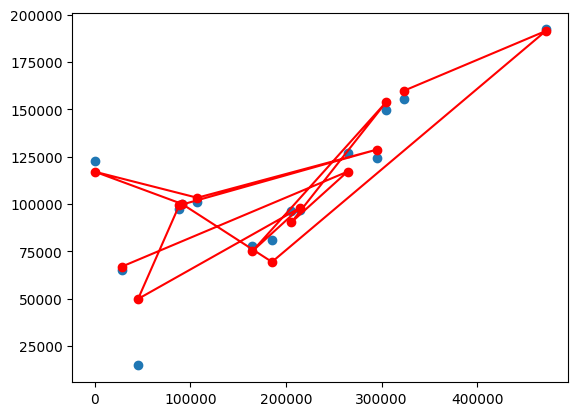

In [23]:
plt.scatter(x_test['Marketing'], y_test)

plt.scatter(x_test['Marketing'], y_pred, color="red")
plt.plot(x_test['Marketing'], y_pred, color="red")

### result visualization (final)

#### pre-process the data

In [27]:
# split the data into x and y
x = df.drop('Profit', axis=1)
y = df['Profit']

#### decompose the RnD and Marketing columns to only one

In [30]:
from sklearn.decomposition import PCA

# create an object
# extract only column from RnD and Marketing
pca = PCA(n_components=1)

# fit the x having 2 columns
pca.fit(x)

# extract one component
x_new = pca.transform(x)

In [33]:
# split data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_new, y, train_size=0.7, random_state=123456)

#### train model

In [34]:
from sklearn.linear_model import LinearRegression

# create model
model = LinearRegression()

# train the model
model.fit(x_train, y_train)

LinearRegression()

#### visualization

In [40]:
y_pred = model.predict(x_test)

Text(0.5, 1.0, 'Profit prediction')

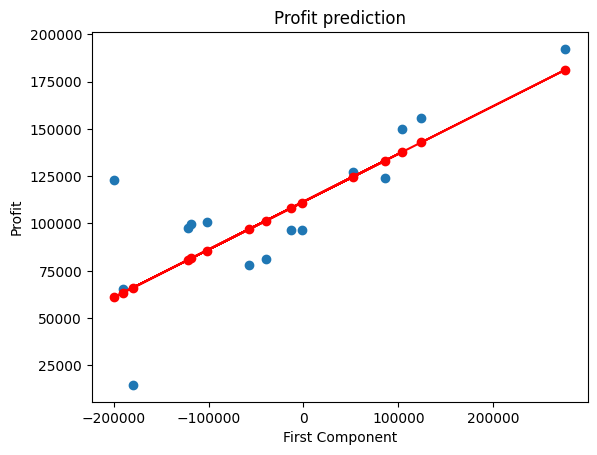

In [43]:
plt.scatter(x_test[:, 0], y_test)
plt.scatter(x_test[:, 0], y_pred, color="red")
plt.plot(x_test[:, 0], y_pred, color="red", label="Best fit Regression Line")
plt.xlabel('First Component')
plt.ylabel('Profit')
plt.title('Profit prediction')

#### evaluate the model

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"mae = {mae}")
print(f"mse = {mse}")
print(f"rmse = {rmse}")
print(f"r2 = {r2}")

mae = 18498.425937807133
mse = 594807968.5840622
rmse = 24388.685257390614
r2 = 0.637304179890683
